In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.shape

(1258, 6)

In [4]:
training_set=dataset_train.iloc[:, 1:2]

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [7]:
training_set_scaled=sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [9]:
X_train=[]
y_train=[]

In [10]:
training_set_scaled.shape

(1258, 1)

In [11]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [12]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [13]:
X_train=np.reshape(X_train, (len(X_train), X_train.shape[1], 1))

In [14]:
X_train.shape[0]

1198

In [15]:
len(X_train)

1198

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
regressor=Sequential()

In [18]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(Dense(units=1))

In [23]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0538
Epoch 2/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 33s 28ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 27s 23ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0018
Epoch 97/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0015


In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:, 1:2]

In [42]:
real_stock_price

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40
5,807.86
6,805.00
7,807.14
8,807.48
9,807.08


In [26]:
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [27]:
inputs=inputs.reshape(-1,1)


In [43]:
inputs

array([[ 779.  ],
       [ 779.66],
       [ 777.71],
       [ 786.66],
       [ 783.76],
       [ 781.22],
       [ 781.65],
       [ 779.8 ],
       [ 787.85],
       [ 798.24],
       [ 803.3 ],
       [ 795.  ],
       [ 804.9 ],
       [ 816.68],
       [ 806.34],
       [ 801.  ],
       [ 808.35],
       [ 795.47],
       [ 782.89],
       [ 778.2 ],
       [ 767.25],
       [ 750.66],
       [ 774.5 ],
       [ 783.4 ],
       [ 779.94],
       [ 791.17],
       [ 756.54],
       [ 755.6 ],
       [ 746.97],
       [ 755.2 ],
       [ 766.92],
       [ 771.37],
       [ 762.61],
       [ 772.63],
       [ 767.73],
       [ 764.26],
       [ 760.  ],
       [ 771.53],
       [ 770.07],
       [ 757.44],
       [ 744.59],
       [ 757.71],
       [ 764.73],
       [ 761.  ],
       [ 772.48],
       [ 780.  ],
       [ 785.04],
       [ 793.9 ],
       [ 797.4 ],
       [ 797.34],
       [ 800.4 ],
       [ 790.22],
       [ 796.76],
       [ 795.84],
       [ 792.36],
       [ 7

In [28]:
len(inputs)

80

In [45]:
inputs=sc.transform(inputs)

In [46]:
inputs

array([[ 0.9299055 ],
       [ 0.93113327],
       [ 0.92750577],
       [ 0.94415507],
       [ 0.93876032],
       [ 0.93403527],
       [ 0.93483518],
       [ 0.9313937 ],
       [ 0.94636878],
       [ 0.96569685],
       [ 0.97510976],
       [ 0.95966962],
       [ 0.97808617],
       [ 1.        ],
       [ 0.98076494],
       [ 0.97083116],
       [ 0.98450406],
       [ 0.96054394],
       [ 0.9371419 ],
       [ 0.92841729],
       [ 0.90804747],
       [ 0.8771858 ],
       [ 0.92153434],
       [ 0.93809063],
       [ 0.93165414],
       [ 0.95254483],
       [ 0.88812412],
       [ 0.88637547],
       [ 0.87032145],
       [ 0.88563137],
       [ 0.90743359],
       [ 0.91571173],
       [ 0.89941588],
       [ 0.91805566],
       [ 0.9089404 ],
       [ 0.9024853 ],
       [ 0.89456061],
       [ 0.91600938],
       [ 0.9132934 ],
       [ 0.88979835],
       [ 0.86589404],
       [ 0.89030062],
       [ 0.90335962],
       [ 0.89642086],
       [ 0.91777662],
       [ 0

In [47]:
X_test=[]
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    

In [48]:
X_test=np.array(X_test)

In [49]:
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [50]:
X_test.shape

(20, 60, 1)

In [51]:
predicted_stock_price=regressor.predict(X_test)

In [52]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [53]:
predicted_stock_price

array([[ 778.29730225],
       [ 775.76525879],
       [ 775.10345459],
       [ 775.88500977],
       [ 778.69696045],
       [ 784.08978271],
       [ 790.02722168],
       [ 793.83605957],
       [ 795.37652588],
       [ 795.41491699],
       [ 794.75592041],
       [ 793.85296631],
       [ 793.05187988],
       [ 792.95300293],
       [ 793.54058838],
       [ 797.09283447],
       [ 803.37335205],
       [ 811.06866455],
       [ 816.82427979],
       [ 815.84075928]], dtype=float32)

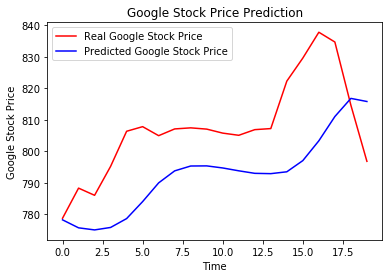

In [54]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()